# SoHAPPY analysis tools
Open a data file and get the detection statistics

In [1]:
import gammapy
gammapy.__version__

'0.17'

In [2]:
import sys
import matplotlib.pyplot as plt
import init as init

## Get data from input file
The files are obtained from the name of the folder.
Possible folder are the following (not exhaustive)

The default delay time is 107 s = 30 s for slewing and 77 s for swift trigger delay

*** Gammapy 0.12 ***

Old default - first 107 s check:
* `outfolder = "../output/check107/"`

Old IRF windows (closest):
* `outfolder = "../output/check107-defvis-10-oldirf/"`

New IRF windows (new cos or log edges, not closest:
* `outfolder = "../output/check107-defvis-10-newirf/"` (default visibility)
* `outfolder = "../output/check107-newvis-10-newirf/"` (recomputed viibility)
* `outfolder = "../output/check107-newvis-24-newirf/"` (New visibility)

*** Gammapy 0.17 ***

New with gammapy 0.17 implementation:
* `outfolder = "../output/test107_17_defvis-newirf/"` (Default visibility)

## Open file (create csv file if not existing)

In [22]:
# outfolder = "../output/check107-newvis-10-newirf/"
# "../output/test107_17_defvis-newirf/"

#outfolder= "../../../output/new17-107-24deg-newirf/"
#outfolder= "../../../output/new17-107-24deg-newirf-100iter/"
#outfolder= "../../../output/new17-107-24deg-newirf-100iter-noacceleration/"
#outfolder= "../../../output/new17-107-24deg-newirf-100iter-noacceleration-LSTonly/"
#outfolder= "../../../output/new17-107-137-24deg-newirf-100iter-noacceleration-Full_N-MST_S/"
outfolder= "../../../output/new17-137-137-24deg-newirf-100iter-noacceleration-MST_N-MST_S/"
#outfolder= "../../../output/test107_12_defvis-newirf-10deg/"
#outfolder= "D:/000_Today/testnew/"
outfolder = "../../../output/check107-newvis-24-newirf/"
outfolder= "../../../output/test-std-newvisimplemntation-24deg/"
outfolder="../../../output/new17-107-137-24deg-newirf-100iter-noacceleration-Full_N-MST_S/"
import os
os.listdir(outfolder)

['analysis.log',
 'config.py',
 'data.csv',
 'data.txt',
 'new17-107-137-24deg-newirf-100iter-noacceleration-Full_N-MST_S_20210324_134758.tar.gz']

In [23]:
file = init.create_csv(outfolder,debug=True)

 >>>  ../../../output/new17-107-137-24deg-newirf-100iter-noacceleration-Full_N-MST_S/data.csv
../../../output/new17-107-137-24deg-newirf-100iter-noacceleration-Full_N-MST_S/data.csv  exists


## Get data and sub-population

- grb : all data
- g_ana : analyzable (visible and simulation completed)
- gn0 : seen North only
- gs0 : seen South only
- gb : seen both site
- gn : seen in North and maybe elsewhere
- gs : seen in South ad maybe elsewhare

In [24]:
(grb, gn0, gs0, gn, gs, gb) = init.get_data(file, debug=True)

 DATA READING from  ../../../output/new17-107-137-24deg-newirf-100iter-noacceleration-Full_N-MST_S/data.csv
Supplementary information is present
 grb.N==1 seen North only
 gbr.S==1 seen South only
 grb.B==1 seen on both

+-------------------------- Flags ---------------------------+
 Flags:
   No visible flag, unvis           =  -999
   Iteration # from error code, 3s and 5s counts :  100 100 100
+----------------------- Statistics -------------------------+
   Not visible   Fully analyzed      Aborted    
      1374            1626              0       

 Raw statistics - max per site = 2000
  - total      :  3000
  - analyzable :  1626
  - North      :  599
  - South      :  613
  - Both sites :  414 -> total =  1626
  - North only :  187
  - South only :  201
+------------------------------------------------------------+


+----------------------- Sanity checks----------------------+
 Estimated min altitude in  North  : 24.0
 Estimated min altitude in  South  : 24.0


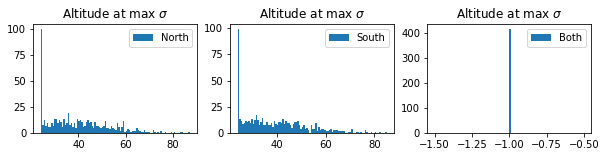

 Estimated total delay in  North  : 108.0
 Estimated total delay in  South  : 145.0


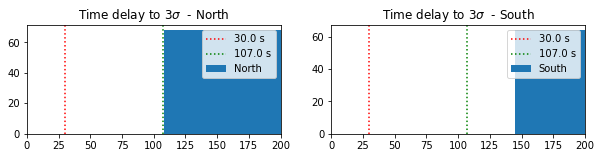

In [25]:
init.sanity_check(grb, gn0, gs0, gn, gs, gb, file, debug=True)

# Check statistics

In [26]:
init.rate(grb)


 -------------------------------------------------------
 Normalized to 1 year
 -------------------------------------------------------
 Rate :       N       S   Nonly   Sonly    Both   Total
 ------ ------- ------- ------- ------- ------- -------
 Vis. :   599.0   613.0   187.0   203.0   414.0   804.0
 Ana. :   599.0   613.0   187.0   203.0   414.0   804.0
 3s   :   105.0    77.0    32.0    18.0   101.0   151.0
 5s   :    93.0    66.0    28.0    14.0    91.0   133.0
 -------------------------------------------------------


In [27]:
init.rate(grb, nyears=44)


 -------------------------------------------------------
 Normalized to 44 years
 -------------------------------------------------------
 Rate :       N       S   Nonly   Sonly    Both   Total
 ------ ------- ------- ------- ------- ------- -------
 Vis. :    13.6    13.9     4.2     4.6     9.4    18.3
 Ana. :    13.6    13.9     4.2     4.6     9.4    18.3
 3s   :     2.4     1.8     0.7     0.4     2.3     3.4
 5s   :     2.1     1.5     0.6     0.3     2.1     3.0
 -------------------------------------------------------
